In [1]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
df = pd.read_pickle('combined_df1.pkl')

In [5]:
icd_chronic = ["F84", "C67", "D09", "C40", "C41", "C49", "C47", "C70", "C71", "C72", "C50", "D05", "C34", "D02",
               "C53", "D06", "R87", "D01", "D00", "C00", "C01", "C02", "C03", "C04", "C05", "C06", "C07", "C08", "C09", "C10", 
               "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", 
               "C27", "C28", "C29", "C30", "C31", "C32", "C76", "C64", "C65", "C51", "C52", "C57", "C58", "D07", "C45", "C48", 
               "C60", "C63", "C33", "C38", "C39", "C66", "C68", "C56", "C61", "R85", "C62", "C73", "E31", "C54", "C55", "C81", 
               "C90", "C91", "C92", "C93", "C94", "C95", "C80", "C43", "D03", "C82", "C83", "C84", "C85", "C86", "C88", "C96", 
               "C44", "D04", "C77", "C78", "C79", "J91", "R18", "C37", "C46", "C69", "C74", "C75", "A18", "A52", "B52", "D30",
               "D41", "D59", "E08", "E09", "E10", "E11", "E13", "E74", "I12", "I13", "I70", "I72", "K76", "M10", "M32", "M35",
               "N00", "N01", "N02", "N03", "N04", "N05", "N06", "N07", "N08", "N13", "N14", "N15", "N16", "N17", "N18", "N19",
               "N25", "N26", "Q61", "Q62", "R94", "J45", "J40", "J41", "J42", "J43", "J44", "J47", "F32", "F33", "F34", "F43",
               "O24", "G32", "R73", "R81", "R82", "O99", "I09", "I50", "I20", "I21", "I24", "I25", "D66", "D67",
               "D68", "B15", "B19", "B16", "B18", "B17", "B25", "B26", "B58", "B94", "K71", "K73", "K74", "K75", "E78", "I10",
               "I11", "I14", "I15", "I16", "I67", "E65", "E66", "D57", "G45", "G46", "G97", "I60", "I61", "I63", "I66", "I97"]

In [6]:
existing_columns = [column for column in icd_chronic if column in df.columns]

In [7]:
df = df.drop(columns=existing_columns)

In [8]:
object_columns = df.select_dtypes(include='object').columns.tolist()

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
cols_to_normalize = ['FKL31','FKL32','FKL34','FKL37','FKL40','FKL43','FKL46','FKL47','FKL48']
data_to_normalize = df[cols_to_normalize]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
df[cols_to_normalize] = normalized_data

In [11]:
normalized_data = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

In [12]:
correlation_matrix = df_normalized.corr()

In [13]:
train_df = pd.read_pickle("all_train_df.pkl")
test_df = pd.read_pickle("all_test_df.pkl")

In [14]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_df)
train_df = pd.DataFrame(normalized_data, columns=train_df.columns)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(test_df)
test_df = pd.DataFrame(normalized_data, columns=test_df.columns)

In [15]:
correlation_threshold = 0.03
selected_features = correlation_matrix[abs(correlation_matrix['is_chronic']) >= correlation_threshold].index.tolist()
df_selected_features = df[selected_features + ['is_chronic']]

In [16]:
selected_features.remove('is_chronic')

              precision    recall  f1-score   support

         0.0       0.81      0.22      0.35      3432
         1.0       0.78      0.98      0.87      9503

    accuracy                           0.78     12935
   macro avg       0.79      0.60      0.61     12935
weighted avg       0.79      0.78      0.73     12935

Confusion matrix, without normalization
[[ 768 2664]
 [ 178 9325]]


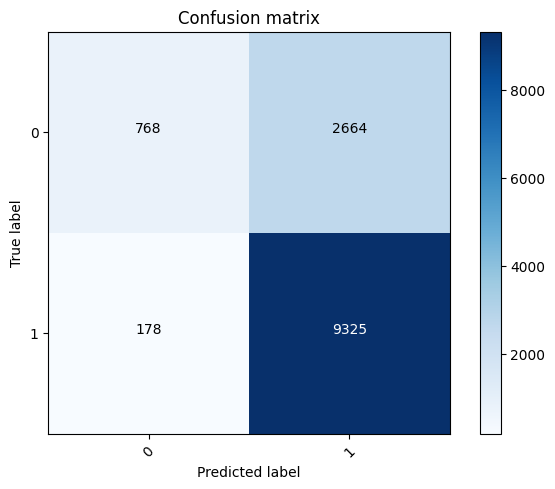

In [17]:
X_train = train_df[selected_features].values
X_test = test_df[selected_features].values

y_train = train_df['is_chronic'].values
y_test = test_df['is_chronic'].values

model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

np.set_printoptions(precision=2)

print (classification_report(y_test, preds))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [19]:
train_df.describe()

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL31,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic
count,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,...,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000,116414.000000
mean,0.004675,0.000588,0.004032,0.000491,0.001684,0.001690,0.000803,0.002762,0.002059,0.000655,...,0.019062,0.022692,0.000012,0.010721,0.000529,0.002043,0.000015,0.011191,0.011186,0.734980
std,0.030127,0.017514,0.016683,0.006456,0.012291,0.021707,0.009946,0.037860,0.024092,0.011986,...,0.031454,0.040006,0.003006,0.043514,0.011455,0.018008,0.002995,0.019746,0.019744,0.441346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003210,0.004603,0.000000,0.000000,0.000000,0.000000,0.000000,0.002188,0.002186,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009629,0.011884,0.000000,0.000000,0.000000,0.000000,0.000000,0.005797,0.005794,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022469,0.025385,0.000000,0.000000,0.000000,0.000000,0.000000,0.012476,0.012473,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
test_df2 = pd.read_pickle("all_test_df.pkl")

In [21]:
test_df2['is_chronic_pred'] = preds

In [22]:
test_df2

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic,is_chronic_pred
21396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,742600.0,0.0,0.0,0.0,0.0,0.0,742600,742600,0,0.0
328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43984500.0,0.0,0.0,0.0,0.0,0.0,43984500,43984500,1,1.0
22223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1656600.0,0.0,0.0,0.0,0.0,0.0,1656600,1656600,0,0.0
98913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16845100.0,0.0,0.0,0.0,0.0,0.0,16845100,16845100,0,1.0
73657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8892200.0,0.0,0.0,0.0,0.0,0.0,8892200,8892200,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29882100.0,0.0,0.0,0.0,0.0,0.0,29882100,29882100,1,1.0
32340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,35370200.0,0.0,0.0,0.0,0.0,0.0,35370200,35370200,1,1.0
102429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10473500.0,0.0,0.0,0.0,0.0,0.0,10473500,10473500,1,1.0
44301,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37529900.0,0.0,0.0,0.0,0.0,0.0,37529900,37529900,1,1.0


In [35]:
filtered_df = test_df2[(test_df2['is_chronic'] == 1) & (test_df2['is_chronic_pred'] == 0)]
filtered_df.describe()

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic,is_chronic_pred
count,178.000000,178.0,178.000000,178.000000,178.000000,178.0,178.0,178.0,178.0,178.0,...,1.780000e+02,178.0,178.0,178.0,178.0,178.0,1.780000e+02,1.780000e+02,178.0,178.0
mean,0.005618,0.0,0.016854,0.005618,0.028090,0.0,0.0,0.0,0.0,0.0,...,1.764467e+06,0.0,0.0,0.0,0.0,0.0,1.764467e+06,1.764467e+06,1.0,0.0
std,0.074953,0.0,0.129087,0.074953,0.196862,0.0,0.0,0.0,0.0,0.0,...,1.410554e+06,0.0,0.0,0.0,0.0,0.0,1.410554e+06,1.410554e+06,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.814000e+05,0.0,0.0,0.0,0.0,0.0,1.814000e+05,1.814000e+05,1.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,7.936500e+05,0.0,0.0,0.0,0.0,0.0,7.936500e+05,7.936500e+05,1.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.453800e+06,0.0,0.0,0.0,0.0,0.0,1.453800e+06,1.453800e+06,1.0,0.0
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.145075e+06,0.0,0.0,0.0,0.0,0.0,2.145075e+06,2.145075e+06,1.0,0.0
max,1.000000,0.0,1.000000,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,...,5.671200e+06,0.0,0.0,0.0,0.0,0.0,5.671200e+06,5.671200e+06,1.0,0.0


In [36]:
print(filtered_df['FKL31'].mean())
print(filtered_df['FKL32'].mean())
print(filtered_df['FKL47'].mean())
print(filtered_df['FKL48'].mean())

12.168539325842696
1764467.4157303371
1764467.4157303371
1764467.4157303371


In [37]:
filtered_df = test_df2[(test_df2['is_chronic'] == 0) & (test_df2['is_chronic_pred'] == 1)]
filtered_df.describe()

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic,is_chronic_pred
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,...,2.664000e+03,2664.0,2.664000e+03,2.664000e+03,2.664000e+03,2664.0,2.664000e+03,2.664000e+03,2664.0,2664.0
mean,0.028153,0.001502,0.067943,0.031907,0.046171,0.004129,0.007132,0.006006,0.010886,0.015390,...,1.029336e+07,0.0,5.033361e+05,4.297541e+04,3.163720e+04,0.0,1.089959e+07,1.089815e+07,0.0,1.0
std,0.180632,0.047443,0.306827,0.287614,0.277671,0.064138,0.084166,0.077280,0.107343,0.642227,...,1.261734e+07,0.0,1.765042e+06,7.989082e+05,2.720849e+05,0.0,1.348512e+07,1.348540e+07,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.344000e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.344000e+05,1.344000e+05,0.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.846350e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.846350e+06,2.837400e+06,0.0,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.852100e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,7.189650e+06,7.189650e+06,0.0,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.319190e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.434008e+07,1.434008e+07,0.0,1.0
max,3.000000,2.000000,4.000000,9.000000,5.000000,1.000000,1.000000,1.000000,2.000000,33.000000,...,1.643777e+08,0.0,1.972110e+07,2.651230e+07,5.625000e+06,0.0,1.824597e+08,1.824597e+08,0.0,1.0


In [38]:
print(filtered_df['FKL31'].mean())
print(filtered_df['FKL32'].mean())
print(filtered_df['FKL47'].mean())
print(filtered_df['FKL48'].mean())

41.18205705705706
10293355.209084084
10899592.182057057
10898147.071321322


In [39]:
filtered_df = test_df2[(test_df2['is_chronic'] == 1) & (test_df2['is_chronic_pred'] == 1)]
filtered_df.describe()

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic,is_chronic_pred
count,9325.000000,9325.000000,9325.000000,9325.000000,9325.000000,9325.000000,9325.000000,9325.000000,9325.000000,9325.000000,...,9.325000e+03,9325.0,9.325000e+03,9.325000e+03,9.325000e+03,9.325000e+03,9.325000e+03,9.325000e+03,9325.0,9325.0
mean,0.036783,0.001716,0.115603,0.032493,0.065630,0.008043,0.009008,0.004718,0.009651,0.006756,...,2.818709e+07,0.0,9.676659e+05,7.256416e+04,4.101625e+04,6.336064e+03,2.935877e+07,2.935349e+07,1.0,1.0
std,0.233044,0.048544,0.447283,0.280029,0.443485,0.091695,0.104203,0.078729,0.112082,0.101772,...,4.406809e+07,0.0,3.804255e+06,1.164623e+06,3.166640e+05,1.364102e+05,4.568163e+07,4.568132e+07,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.624000e+05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.624000e+05,1.624000e+05,1.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.831100e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.913000e+06,7.899100e+06,1.0,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.570660e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.619230e+07,1.618580e+07,1.0,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.122990e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.230560e+07,3.229777e+07,1.0,1.0
max,7.000000,3.000000,9.000000,8.000000,19.000000,2.000000,4.000000,4.000000,4.000000,3.000000,...,6.611524e+08,0.0,8.542460e+07,2.698390e+07,7.815000e+06,3.264500e+06,6.671206e+08,6.671206e+08,1.0,1.0


In [40]:
print(filtered_df['FKL31'].mean())
print(filtered_df['FKL32'].mean())
print(filtered_df['FKL47'].mean())
print(filtered_df['FKL48'].mean())

80.15571045576408
28187091.62466488
29358771.563324396
29353494.94005362


In [41]:
filtered_df = test_df2[(test_df2['is_chronic'] == 0) & (test_df2['is_chronic_pred'] == 0)]
filtered_df.describe()

,A01,A06,A09,A15,A16,A41,A49,A90,A91,B02,...,FKL32,FKL34,FKL37,FKL40,FKL43,FKL46,FKL47,FKL48,is_chronic,is_chronic_pred
count,768.000000,768.0,768.000000,768.000000,768.000000,768.000000,768.0,768.0,768.000000,768.000000,...,7.680000e+02,768.0,7.680000e+02,768.0,768.000000,768.0,7.680000e+02,7.680000e+02,768.0,768.0
mean,0.003906,0.0,0.018229,0.001302,0.009115,0.002604,0.0,0.0,0.002604,0.001302,...,1.038974e+06,0.0,6.067135e+04,0.0,1122.786458,0.0,1.100768e+06,1.100162e+06,0.0,0.0
std,0.062418,0.0,0.152103,0.036084,0.095096,0.050998,0.0,0.0,0.050998,0.036084,...,1.264871e+06,0.0,6.339220e+05,0.0,31115.571070,0.0,1.682525e+06,1.681066e+06,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.253000e+05,0.0,0.000000e+00,0.0,0.000000,0.0,1.253000e+05,1.253000e+05,0.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,2.277000e+05,0.0,0.000000e+00,0.0,0.000000,0.0,2.277000e+05,2.277000e+05,0.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,5.587000e+05,0.0,0.000000e+00,0.0,0.000000,0.0,5.587000e+05,5.587000e+05,0.0,0.0
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.357075e+06,0.0,0.000000e+00,0.0,0.000000,0.0,1.357075e+06,1.357075e+06,0.0,0.0
max,1.000000,0.0,2.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,...,8.158100e+06,0.0,7.342000e+06,0.0,862300.000000,0.0,1.545240e+07,1.545240e+07,0.0,0.0


In [42]:
print(filtered_df['FKL31'].mean())
print(filtered_df['FKL32'].mean())
print(filtered_df['FKL47'].mean())
print(filtered_df['FKL48'].mean())

6.920572916666667
1038973.6979166666
1100767.8385416667
1100162.265625
